<a href="https://colab.research.google.com/github/LazyHooks/AI_Jobs_Disruption/blob/main/MM_aut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [79]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [80]:
import warnings

warnings.filterwarnings('ignore')

input

In [81]:
df = pd.read_csv("MM_aut.csv")

exploratory

In [82]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Accountability    717 non-null    int64
 1   Knowledge         717 non-null    int64
 2   Problem Solving   717 non-null    int64
 3   Interaction       717 non-null    int64
 4   Impact            717 non-null    int64
 5   Accountability.1  717 non-null    int64
dtypes: int64(6)
memory usage: 33.7 KB


In [83]:
df.head()

,Accountability,Knowledge,Problem Solving,Interaction,Impact,Accountability.1
0,0,221,48,52,90,0
1,0,75,27,36,64,0
2,0,181,48,66,64,0
3,0,75,36,36,90,0
4,0,75,36,36,90,0


checks

In [84]:
df.isnull().sum()
df.describe()

,Accountability,Knowledge,Problem Solving,Interaction,Impact,Accountability.1
count,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,30.913529,136.364017,50.490934,60.940028,121.083682,30.913529
std,17.380021,61.321504,18.096312,21.964306,35.753755,17.380021
min,0.000000,75.000000,27.000000,36.000000,55.000000,0.000000
25%,21.000000,75.000000,36.000000,36.000000,90.000000,21.000000
50%,35.000000,181.000000,48.000000,66.000000,116.000000,35.000000
75%,42.000000,181.000000,65.000000,66.000000,142.000000,42.000000
max,75.000000,300.000000,117.000000,150.000000,213.000000,75.000000


In [85]:
X=df

Scaling

In [86]:
cols = X.columns

In [87]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [88]:
X = pd.DataFrame(X, columns=[cols])

In [89]:
X.head()

,Accountability,Knowledge,Problem Solving,Interaction,Impact,Accountability.1
0,0.0,0.648889,0.233333,0.140351,0.221519,0.0
1,0.0,0.000000,0.000000,0.000000,0.056962,0.0
2,0.0,0.471111,0.233333,0.263158,0.056962,0.0
3,0.0,0.000000,0.100000,0.000000,0.221519,0.0
4,0.0,0.000000,0.100000,0.000000,0.221519,0.0


In [90]:
X.dropna(inplace=True)
X

,Accountability,Knowledge,Problem Solving,Interaction,Impact,Accountability.1
0,0.000000,0.648889,0.233333,0.140351,0.221519,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.056962,0.000000
2,0.000000,0.471111,0.233333,0.263158,0.056962,0.000000
3,0.000000,0.000000,0.100000,0.000000,0.221519,0.000000
4,0.000000,0.000000,0.100000,0.000000,0.221519,0.000000
...,...,...,...,...,...,...
712,0.333333,0.084444,0.233333,0.263158,0.898734,0.333333
713,0.800000,0.471111,0.233333,0.421053,0.639241,0.800000
714,0.800000,0.471111,0.233333,0.421053,0.639241,0.800000
715,0.466667,0.471111,1.000000,0.263158,0.816456,0.466667


K means

In [91]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [92]:
kmeans.cluster_centers_

array([[0.40730807, 0.00344671, 0.19183673, 0.06209401, 0.42759346,
        0.40730807],
       [0.41664884, 0.51969103, 0.32445039, 0.36246365, 0.40968321,
        0.41664884]])

inertia

In [93]:
kmeans.inertia_

155.21322670484378

Elbow

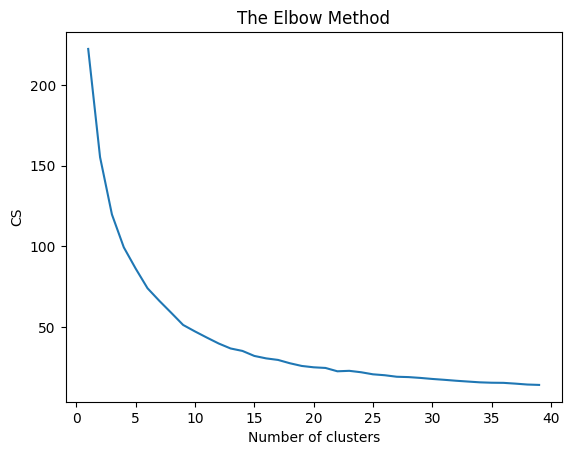

In [94]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

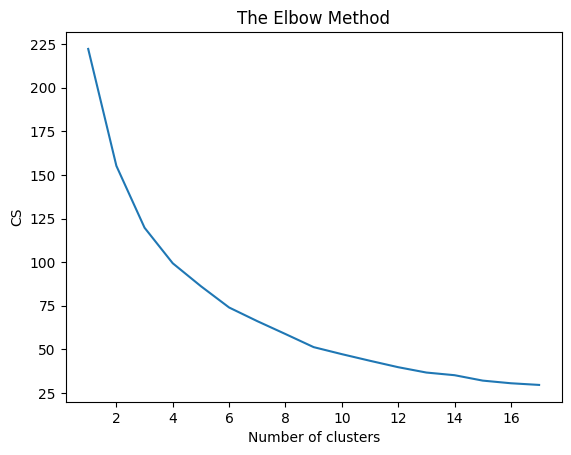

In [106]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 18):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 18), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [134]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=6, random_state=0)

In [135]:
labels=kmeans.labels_
pd.DataFrame(labels).to_csv('jm_aut_l')
print(labels)

[2 0 2 0 0 0 2 2 0 2 1 2 0 0 2 2 2 2 2 2 2 0 0 0 0 0 1 2 0 0 0 0 2 2 2 2 0
 0 1 0 0 2 2 0 1 0 0 1 0 1 2 0 0 0 2 0 2 2 2 0 0 2 1 1 0 2 2 2 2 2 0 0 2 0
 2 0 0 1 1 0 2 1 1 0 2 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 3 1 1 2 2 1
 1 1 0 0 0 0 0 0 0 2 2 2 2 2 2 0 1 1 0 0 0 1 1 1 1 1 1 2 2 0 0 0 0 1 1 0 1
 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 2 2 0 0 0 0 0 0 1 2 4 0 0 1 1 2 0 1 1 1 0 0
 1 1 4 4 2 2 2 2 2 2 2 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 5 1 4 4 0 0 1 0 0 1 5
 0 0 1 5 5 1 4 4 1 1 1 1 0 2 0 0 0 4 1 1 4 4 4 1 4 4 1 5 0 4 4 1 5 4 5 4 1
 4 1 4 4 5 4 1 1 5 1 1 5 4 1 5 4 1 5 5 4 1 5 4 5 4 2 4 2 0 5 5 4 5 5 5 5 5
 1 1 4 2 2 2 2 2 1 1 1 1 1 5 3 4 4 0 0 3 1 1 4 1 1 4 5 1 1 4 3 3 1 3 3 3 1
 3 3 3 3 3 3 1 4 1 4 5 5 3 4 1 1 1 0 5 4 0 2 3 5 1 1 3 3 3 3 3 1 0 1 1 1 1
 4 4 5 0 5 5 5 3 4 0 0 5 5 4 1 0 3 5 3 3 1 1 1 0 0 0 0 5 4 4 5 5 1 1 3 1 0
 1 0 3 1 1 3 3 3 1 3 1 4 5 1 3 3 1 1 1 5 0 3 3 3 3 1 3 3 1 3 1 5 5 5 3 3 5
 4 0 0 4 4 4 0 1 1 3 3 5 1 0 0 1 3 3 3 3 1 1 3 3 3 3 3 3 1 1 3 1 3 3 3 3 3
 3 1 1 4 5 3 0 5 1 4 4 3 

In [136]:
Z=kmeans.cluster_centers_
Z

array([[1.91692308e-01, 6.49572650e-04, 1.65641026e-01, 3.73819163e-02,
        3.49464460e-01, 1.91692308e-01],
       [3.99420290e-01, 4.86570048e-01, 2.78019324e-01, 3.24847445e-01,
        3.22750413e-01, 3.99420290e-01],
       [0.00000000e+00, 5.44888889e-01, 3.03760684e-01, 3.54385965e-01,
        2.98149951e-01, 0.00000000e+00],
       [5.51156463e-01, 1.66533454e-16, 3.70748299e-02, 9.66702470e-03,
        2.70085249e-01, 5.51156463e-01],
       [5.28735632e-01, 1.01915709e-02, 3.58908046e-01, 1.35813672e-01,
        6.52280663e-01, 5.28735632e-01],
       [6.59462366e-01, 5.59139785e-01, 3.98745520e-01, 4.23316355e-01,
        5.93201307e-01, 6.59462366e-01]])

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 717 samples in 0.001s...
[t-SNE] Computed neighbors for 717 samples in 0.028s...
[t-SNE] Computed conditional probabilities for sample 717 / 717
[t-SNE] Mean sigma: 0.220156
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.598900
[t-SNE] KL divergence after 1600 iterations: 0.131798


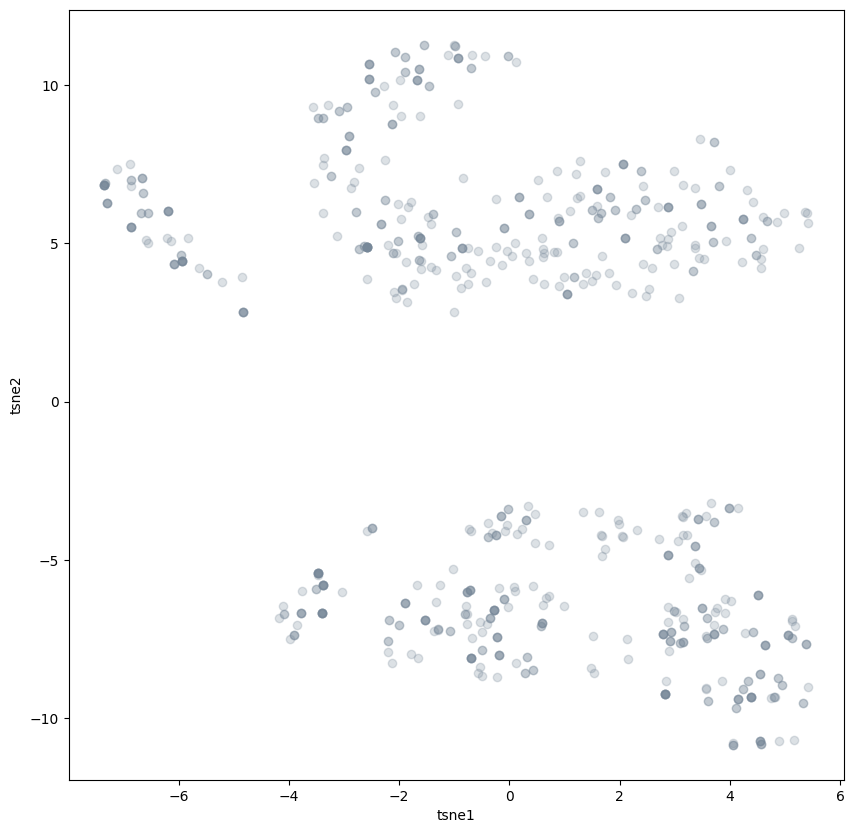

In [137]:

tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

In [138]:
import matplotlib

In [139]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=2500, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])


[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 717 samples in 0.001s...
[t-SNE] Computed neighbors for 717 samples in 0.025s...
[t-SNE] Computed conditional probabilities for sample 717 / 717
[t-SNE] Mean sigma: 0.220156
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.684853
[t-SNE] KL divergence after 1550 iterations: 0.171400


In [140]:
np.unique(labels)


array([0, 1, 2, 3, 4, 5], dtype=int32)

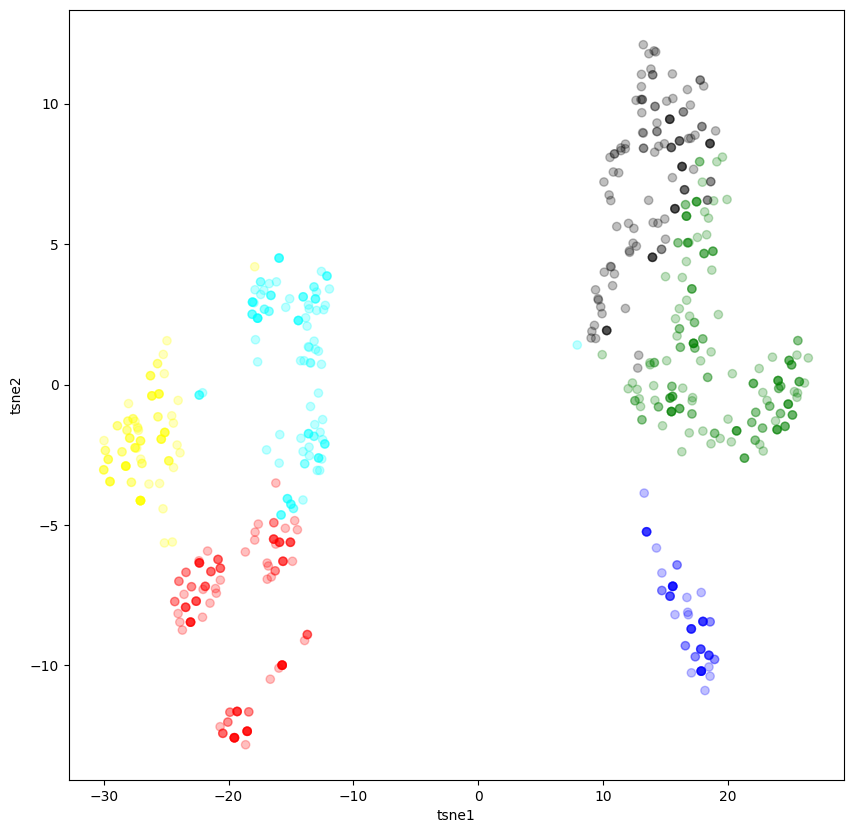

In [141]:
colors = ["red","green","blue","purple","yellow","cyan","black"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [142]:
Z2 = ms.inverse_transform(Z)
pd.DataFrame(Z2).to_csv('cc_jm_aut.csv')
Z2

array([[ 14.37692308,  75.14615385,  41.90769231,  40.26153846,
        110.21538462,  14.37692308],
       [ 29.95652174, 184.47826087,  52.02173913,  73.0326087 ,
        105.99456522,  29.95652174],
       [  0.        , 197.6       ,  54.33846154,  76.4       ,
        102.10769231,   0.        ],
       [ 41.33673469,  75.        ,  30.33673469,  37.10204082,
         97.67346939,  41.33673469],
       [ 39.65517241,  77.29310345,  59.30172414,  51.48275862,
        158.06034483,  39.65517241],
       [ 49.45967742, 200.80645161,  62.88709677,  84.25806452,
        148.72580645,  49.45967742]])